In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
from astropy import constants as ac
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
cd /content/drive/MyDrive/ExoPlex_dist/

/content/drive/.shortcut-targets-by-id/1CklpevfgBa21F5mnzM59y_7t9YrIFMED/ExoPlex_dist


In [ ]:
cd Group_5/

/content/drive/.shortcut-targets-by-id/1CklpevfgBa21F5mnzM59y_7t9YrIFMED/ExoPlex_dist/Group_5


In [ ]:
!python Group_X.py --mass=1
# Calcuates properties of Earth, using the mass from the NASA Planetary Fact Sheet: https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(52.55497015), 'MgO': np.float64(39.17101638), 'CaO': np.float64(3.81493827), 'Al2O3': np.float64(4.45907521)}
Mantle Fe# -0.0
Core Mass Percent =  32.816

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.9SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

# TRAPPIST-1f
Mass: 1.039$\pm$0.031 earth masses

Radius: 1.045 earth radii

\

##Task 1:

Host star [Fe/H]: 0.05350 dex

Host star [Mg/H]: 0.1635 dex (est.)

Host star [Si/H]: 0.0785 dex (est.)

\

From these values, I find:

Host star Si/Mg molar ratio: 0.6167

Host star Fe/Mg molar ratio: 0.7762

## Task 2:

Stellar flux at orbital distance of planet:  $f_d = \frac{L_*}{4 \pi d^2}$

Incident luminosity of planet: $I=f_d\times{{\pi r}^2}$

$L_*$ of TRAPPIST-1: $2.11\times10^{23}$ watts

Orbital distance of TRAPPIST-1f: $5.75\times10^{9}$ meters

\
#### Results:

Stellar flux at TRAPPIST-1f: $506.44\ \frac{W}{m^2}$

Incident luminosity of TRAPPIST-1f: $7.068\times10^{16}\ W$

In [2]:
planet_data = {
    'Planet': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'TRAPPIST-1f'],
    'Mass (Earth masses)': [0.055, 0.815, 1.000, 0.107, 317.8, 95.2, 14.5, 17.1, 1.039],
    'Radius (Earth radii)': [0.383, 0.950, 1.000, 0.532, 11.21, 9.45, 4.01, 3.88, 1.045],
    'Period (days)': [88.0, 224.7, 365.2, 687.0, 4331, 10747, 30589, 59800, 9.207540],
    'Semi-major axis (AU)': [0.387, 0.723, 1.000, 1.524, 5.203, 9.537, 19.191, 30.069, 0.03849],
    'Color': ['#E5E5E5', '#877882', '#1E90FF', '#BC2732', '#FFA500', '#C4B08B', '#ADD8E6', '#00008B', '#FF00FF'],
    'Stellar Luminosity (W)': [3.83e+26, 3.83e+26, 3.83e+26, 3.83e+26, 3.83e+26, 3.83e+26, 3.83e+26, 3.83e+26, 2.11e+23]
}

planet_df = pd.DataFrame(planet_data)

def stellar_flux(L,d):
  return L / (4 * math.pi * ((d * 1.49597871e+11) ** 2))

def incident_luminosity(f, r):
  return f * math.pi * ((r * 6378100) ** 2)

planet_df['Stellar Flux (W/m^2)'] = stellar_flux(planet_df['Stellar Luminosity (W)'], planet_df['Semi-major axis (AU)'])
planet_df['Incident Luminosity (W)'] = incident_luminosity(planet_df['Stellar Flux (W/m^2)'], planet_df['Radius (Earth radii)'])

In [4]:
planet_df.tail(3)

,Planet,Mass (Earth masses),Radius (Earth radii),Period (days),Semi-major axis (AU),Color,Stellar Luminosity (W),Stellar Flux (W/m^2),Incident Luminosity (W)
6,Uranus,14.500,4.010,30589.00000,19.19100,#ADD8E6,3.830000e+26,3.697795,7.599135e+15
7,Neptune,17.100,3.880,59800.00000,30.06900,#00008B,3.830000e+26,1.506261,2.897985e+15
8,TRAPPIST-1f,1.039,1.045,9.20754,0.03849,#FF00FF,2.110000e+23,506.437601,7.067911e+16


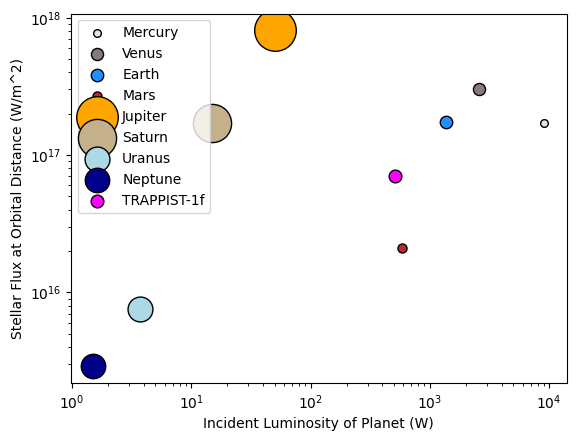

In [16]:
fig, ax = plt.subplots()
for i in planet_df.index:
  plt.scatter(planet_df["Stellar Flux (W/m^2)"][i], planet_df["Incident Luminosity (W)"][i], s=planet_df["Radius (Earth radii)"][i]*80, linewidths=1, edgecolors="black", c=planet_df["Color"][i], label=planet_df["Planet"][i])
ax.set_ylabel('Stellar Flux at Orbital Distance (W/m^2)')
ax.set_xlabel('Incident Luminosity of Planet (W)')
plt.xscale("log")
plt.yscale("log")
plt.legend(loc='best')
plt.show()

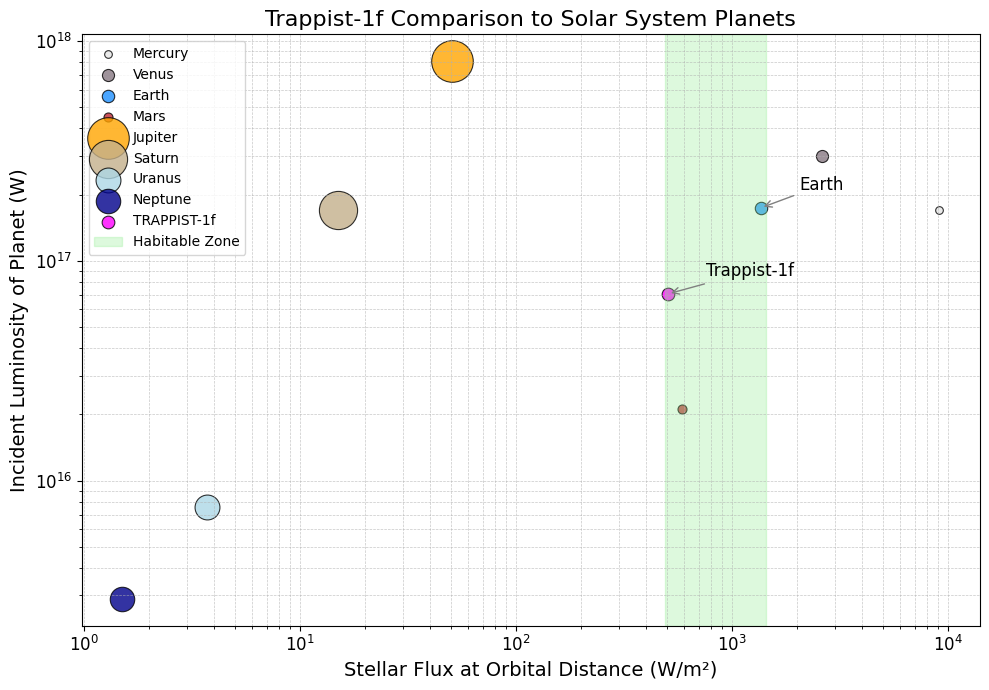

In [27]:
# Improved scatter plot comparing solar system planets with Trappist-1f for presentation
fig, ax = plt.subplots(figsize=(10, 7))

for i in planet_df.index:
    ax.scatter(
        planet_df["Stellar Flux (W/m^2)"][i],
        planet_df["Incident Luminosity (W)"][i],
        s=planet_df["Radius (Earth radii)"][i] * 80,
        edgecolors='black',
        linewidths=0.8,
        color=planet_df["Color"][i],
        label=planet_df["Planet"][i],
        alpha=0.8
    )
# Generalized Solar-system-like habitable zone flux bounds
# Kopparapu et al. (2014)
outer_HZ = 490  # outer edge
inner_HZ = 1434  # inner edge

# Add shaded band for habitable zone
ax.axvspan(inner_HZ, outer_HZ, color='lightgreen', alpha=0.3, label='Habitable Zone')

# Adding arrow pointing at T-1f
trappist_index = planet_df[planet_df["Planet"] == "TRAPPIST-1f"].index[0]
x_t1f = planet_df["Stellar Flux (W/m^2)"][trappist_index]
y_t1f = planet_df["Incident Luminosity (W)"][trappist_index]
ax.annotate("Trappist-1f", xy=(x_t1f, y_t1f), xytext=(x_t1f*1.5, y_t1f*1.2),
            arrowprops=dict(arrowstyle="->", color='gray'), fontsize=12)

# Adding arrow point to Earth
earth_index = planet_df[planet_df["Planet"] == "Earth"].index[0]
x_earth = planet_df["Stellar Flux (W/m^2)"][earth_index]
y_earth = planet_df["Incident Luminosity (W)"][earth_index]
ax.annotate("Earth", xy=(x_earth, y_earth), xytext=(x_earth*1.5, y_earth*1.2),
            arrowprops=dict(arrowstyle="->", color='gray'), fontsize=12)

# Setting axes ticks, labels, and legend
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Stellar Flux at Orbital Distance (W/m²)", fontsize=14)
ax.set_ylabel("Incident Luminosity of Planet (W)", fontsize=14)
ax.set_title("Trappist-1f Comparison to Solar System Planets", fontsize=16)

ax.tick_params(axis='both', labelsize=12)
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), fontsize=10, loc='upper left', frameon=True)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

## Task 3:
I begin by calculating the expected radius and average density of TRAPPIST-1f given the measured mass and the refractory composition determined in Task 1.

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.7762


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  33.545

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  33.545

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

In [ ]:
mass_Tf_1 = 1.039 # in Earth masses, measured value for mass of TRAPPIST-1f
radius_Tf_1 = 1.011 # in Earth radii, expected radius of TRAPPIST-1f from host star composition and measured mass
density_Tf_1 = (mass_Tf_1 * ac.M_earth)/((4/3) * math.pi * ((radius_Tf_1 * ac.R_earth)**3)) # average density of TRAPPIST-1f in kg/m^3
print("The average density of TRAPPIST-1f (based on expected radius from host star composition and measured mass) is", round(density_Tf_1,1))

The average density of TRAPPIST-1f (based on expected radius from host star composition and measured mass) is 5525.0 kg / m3


Next, the upper and lower limits on the density, using the uncertainty in the measured mass.

Upper limit: 1.039 + 0.031 = 1.07 earth masses

Lower limit: 1.039 - 0.031 = 1.008 earth masses

In [ ]:
!python Group_X.py --mass=1.07 --SiMg=0.6167 --FeMg=0.7762


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  33.545

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  33.545

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

In [ ]:
!python Group_X.py --mass=1.008 --SiMg=0.6167 --FeMg=0.7762


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  33.545

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  33.545

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

In [ ]:

mass_Tf_upper = 1.07 # in Earth masses, upper limit for mass of TRAPPIST-1f
radius_Tf_upper = 1.020 # in Earth radii, upper limit for expected radius of TRAPPIST-1f from host star composition and upper limit for mass
density_Tf_upper = (mass_Tf_upper * ac.M_earth)/((4/3) * math.pi * ((radius_Tf_upper * ac.R_earth)**3)) # upper limit for density of TRAPPIST-1f in kg/m^3
print("The upper limit for density of TRAPPIST-1f (based on upper limit for expected radius from host star composition and upper limit for mass) is", round(density_Tf_upper,1))

mass_Tf_lower = 1.008 # in Earth masses, lower limit for mass of TRAPPIST-1f
radius_Tf_lower = 1.003 # in Earth radii, lower limit for expected radius of TRAPPIST-1f from host star composition and lower limit for mass
density_Tf_lower = (mass_Tf_lower * ac.M_earth)/((4/3) * math.pi * ((radius_Tf_lower * ac.R_earth)**3)) # lower limit for density of TRAPPIST-1f in kg/m^3
print("The lower limit for density of TRAPPIST-1f (based on lower limit for expected radius from host star composition and lower limit for mass) is", round(density_Tf_lower,1))

The upper limit for density of TRAPPIST-1f (based on upper limit for expected radius from host star composition and upper limit for mass) is 5540.5 kg / m3
The lower limit for density of TRAPPIST-1f (based on lower limit for expected radius from host star composition and lower limit for mass) is 5489.4 kg / m3


### Results:

Expected Radius:  $1.011_{-0.008}^{+0.009}$ earth radii

Avg. density:  $5525_{-35.6}^{+15.5}\ \frac{kg}{m^3}$

## Task 4

Fiddle with exoplex until a mass of 1.039
 earths produces an expected radius of 1.045 earths

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.39


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  20.231

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  20.231

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

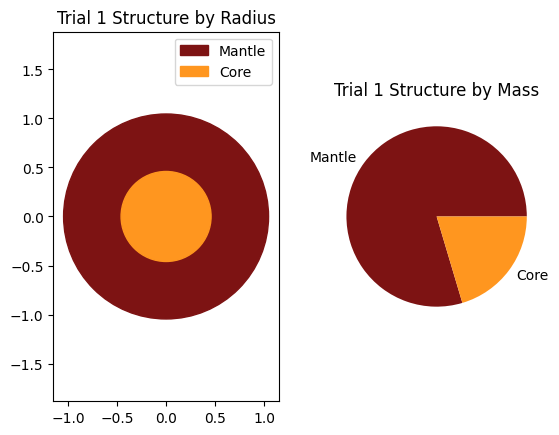

In [ ]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

core_1 = T1f_radius * (43.91 / 100)
core_mass_1 = T1f_mass * (20.39 / 100)
mantle_mass_1 = T1f_mass - core_mass_1
radii_1 = [T1f_radius, core_1]
mass_1 = [mantle_mass_1, core_mass_1]

#by radius
def concentric_circles(radii, colors):
    for i, radius in enumerate(radii):
        plt.subplot(1, 2, 1)
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True)
        plt.gca().add_patch(circle)
        plt.axis('equal')
        plt.title('Trial 1 Structure by Radius')
        plt.legend(labels)
        plt.plot()

concentric_circles(radii_1, structure_colors)

#By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_1, labels = labels, colors = structure_colors)
plt.title('Trial 1 Structure by Mass')
plt.show()

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.44 --mol_frac_Fe_mantle=0.66


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(19.54668176), 'SiO2': np.float64(34.71579666), 'MgO': np.float64(37.76128316), 'CaO': np.float64(3.67764172), 'Al2O3': np.float64(4.2985967)}
Mantle Fe# 0.22504649721016726
Core Mass Percent =  7.259

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.20Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(100.0), 'Si': np.float64(0.0), 'O': np.float64(0.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(19.54668176), 'SiO2': np.float64(34.71579666), 'MgO': np.float64(37.76128316), 'CaO': np.float64(3.67764172), 'Al2O3': np.float64(4.2985967)}
Mantle Fe# 0.22504649721016726
Core Mass Percent =  7.259

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.20Fe
The Lower mantle .tab already exists, please wait b

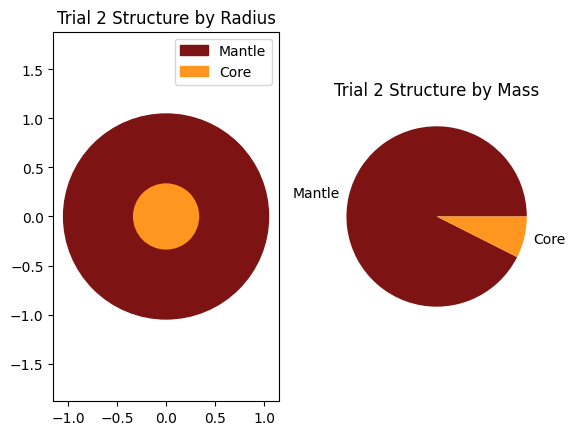

In [ ]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

core_2 = T1f_radius * (31.65 / 100)
core_mass_2 = T1f_mass * (7.44 / 100)
mantle_mass_2 = T1f_mass - core_mass_2
radii_2 = [T1f_radius, core_2]
mass_2 = [mantle_mass_2, core_mass_2]

#by radius
def concentric_circles(radii, colors):
    for i, radius in enumerate(radii):
        plt.subplot(1, 2, 1)
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True)
        plt.gca().add_patch(circle)
        plt.axis('equal')
        plt.title('Trial 2 Structure by Radius')
        plt.legend(labels)
        plt.plot()

concentric_circles(radii_2, structure_colors)

#By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_2, labels = labels, colors = structure_colors)
plt.title('Trial 2 Structure by Mass')
plt.show()

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.7762 --wt_frac_O_core=0.19


Core composition:  {'Fe': np.float64(81.0), 'Si': np.float64(0.0), 'O': np.float64(19.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  38.392

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(81.0), 'Si': np.float64(0.0), 'O': np.float64(19.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  38.392

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

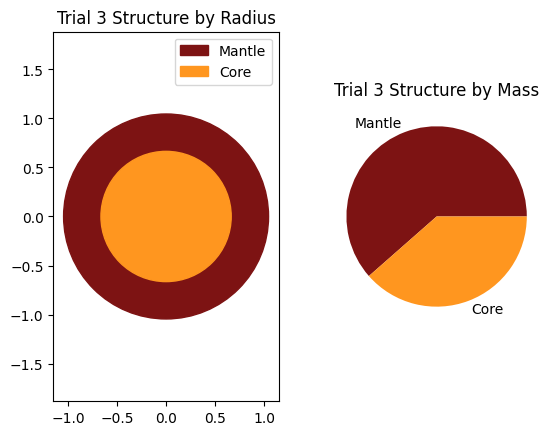

In [ ]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

core_3 = T1f_radius * (63.55 / 100)
core_mass_3 = T1f_mass * (38.52 / 100)
mantle_mass_3 = T1f_mass - core_mass_3
radii_3 = [T1f_radius, core_3]
mass_3 = [mantle_mass_3, core_mass_3]

#by radius
def concentric_circles(radii, colors):
    for i, radius in enumerate(radii):
        plt.subplot(1, 2, 1)
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True)
        plt.gca().add_patch(circle)
        plt.axis('equal')
        plt.title('Trial 3 Structure by Radius')
        plt.legend(labels)
        plt.plot()

concentric_circles(radii_3, structure_colors)

#By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_3, labels = labels, colors = structure_colors)
plt.title('Trial 3 Structure by Mass')
plt.show()

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.7762 --wt_frac_Si_core=0.07 --wt_frac_O_core=0.22


Core composition:  {'Fe': np.float64(71.0), 'Si': np.float64(7.0), 'O': np.float64(22.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(14.0116268), 'SiO2': np.float64(32.74115202), 'MgO': np.float64(43.96135442), 'CaO': np.float64(4.28147821), 'Al2O3': np.float64(5.00438854)}
Mantle Fe# 0.15168568764989093
Core Mass Percent =  33.884

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.5SiMg_0.0NaMg_0.15Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(71.0), 'Si': np.float64(7.0), 'O': np.float64(22.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(14.0116268), 'SiO2': np.float64(32.74115202), 'MgO': np.float64(43.96135442), 'CaO': np.float64(4.28147821), 'Al2O3': np.float64(5.00438854)}
Mantle Fe# 0.15168568764989093
Core Mass Percent =  33.884

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.5SiMg_0.0NaMg_0.15Fe
The Lower mantle .tab already exists, please wait

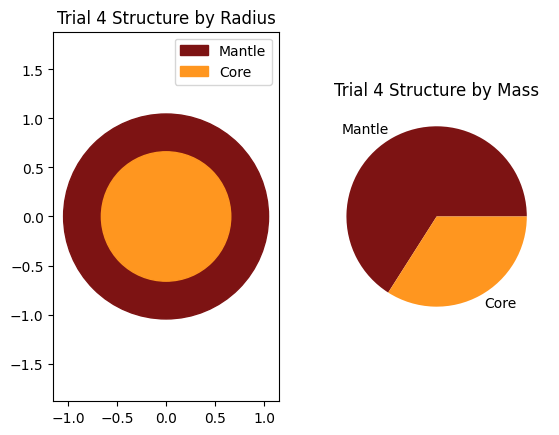

In [ ]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

core_4 = T1f_radius * (63.13 / 100)
core_mass_4 = T1f_mass * (34.02 / 100)
mantle_mass_4 = T1f_mass - core_mass_4
radii_4 = [T1f_radius, core_4]
mass_4 = [mantle_mass_4, core_mass_4]

#by radius
def concentric_circles(radii, colors):
    for i, radius in enumerate(radii):
        plt.subplot(1, 2, 1)
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True)
        plt.gca().add_patch(circle)
        plt.axis('equal')
        plt.title('Trial 4 Structure by Radius')
        plt.legend(labels)
        plt.plot()

concentric_circles(radii_4, structure_colors)

#By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_4, labels = labels, colors = structure_colors)
plt.title('Trial 4 Structure by Mass')
plt.show()

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.7762 --wt_frac_S_core=0.85 --wt_frac_O_core=0.05


Core composition:  {'Fe': np.float64(10.0), 'Si': np.float64(0.0), 'O': np.float64(5.0), 'S': np.float64(85.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  83.465

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(10.0), 'Si': np.float64(0.0), 'O': np.float64(5.0), 'S': np.float64(85.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  83.465

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iterati

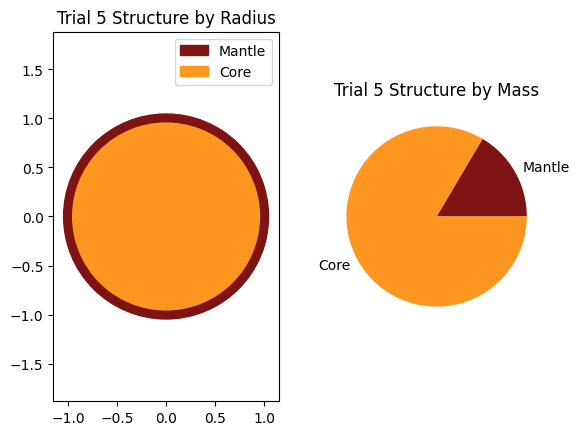

In [ ]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

core_5 = T1f_radius * (91.13 / 100)
core_mass_5 = T1f_mass * (83.50 / 100)
mantle_mass_5 = T1f_mass - core_mass_5
radii_5 = [T1f_radius, core_5]
mass_5 = [mantle_mass_5, core_mass_5]

#by radius
def concentric_circles(radii, colors):
    for i, radius in enumerate(radii):
        plt.subplot(1, 2, 1)
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True)
        plt.gca().add_patch(circle)
        plt.axis('equal')
        plt.title('Trial 5 Structure by Radius')
        plt.legend(labels)
        plt.plot()

concentric_circles(radii_5, structure_colors)

#By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_5, labels = labels, colors = structure_colors)
plt.title('Trial 5 Structure by Mass')
plt.show()

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.7762 --wt_frac_S_core=0.93 --wt_frac_O_core=0.05


Core composition:  {'Fe': np.float64(2.0), 'Si': np.float64(0.0), 'O': np.float64(5.0), 'S': np.float64(93.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  96.189

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(2.0), 'Si': np.float64(0.0), 'O': np.float64(5.0), 'S': np.float64(93.0)}
Mantle composition:  {'FeO': np.float64(0.0), 'SiO2': np.float64(43.15023597), 'MgO': np.float64(46.93564416), 'CaO': np.float64(4.57114983), 'Al2O3': np.float64(5.34297005)}
Mantle Fe# -0.0
Core Mass Percent =  96.189

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iteration

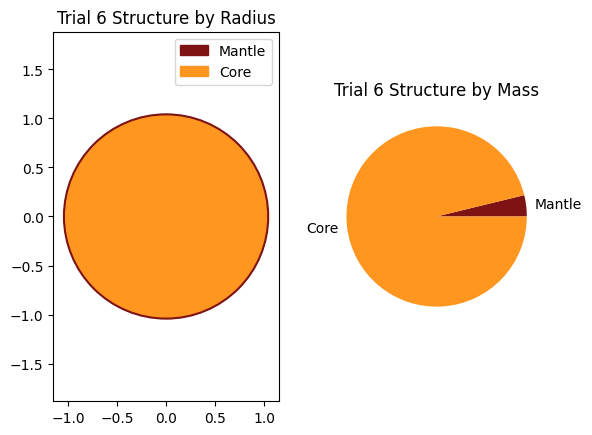

In [ ]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

core_6 = T1f_radius * (97.96 / 100)
core_mass_6 = T1f_mass * (96.20 / 100)
mantle_mass_6 = T1f_mass - core_mass_6
radii_6 = [T1f_radius, core_6]
mass_6 = [mantle_mass_6, core_mass_6]

#by radius
def concentric_circles(radii, colors):
    for i, radius in enumerate(radii):
        plt.subplot(1, 2, 1)
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True)
        plt.gca().add_patch(circle)
        plt.axis('equal')
        plt.title('Trial 6 Structure by Radius')
        plt.legend(labels)
        plt.plot()

concentric_circles(radii_6, structure_colors)

#By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_6, labels = labels, colors = structure_colors)
plt.title('Trial 6 Structure by Mass')
plt.show()

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.7762 --mol_frac_Fe_mantle=0.3 --wt_frac_O_core=0.22


Core composition:  {'Fe': np.float64(78.0), 'Si': np.float64(0.0), 'O': np.float64(22.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(16.30519082), 'SiO2': np.float64(36.11450765), 'MgO': np.float64(39.28269781), 'CaO': np.float64(3.82581513), 'Al2O3': np.float64(4.47178859)}
Mantle Fe# 0.18887789367811444
Core Mass Percent =  27.491

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.15Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(78.0), 'Si': np.float64(0.0), 'O': np.float64(22.0), 'S': np.float64(0.0)}
Mantle composition:  {'FeO': np.float64(16.30519082), 'SiO2': np.float64(36.11450765), 'MgO': np.float64(39.28269781), 'CaO': np.float64(3.82581513), 'Al2O3': np.float64(4.47178859)}
Mantle Fe# 0.18887789367811444
Core Mass Percent =  27.491

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.6SiMg_0.0NaMg_0.15Fe
The Lower mantle .tab already exists, please wa

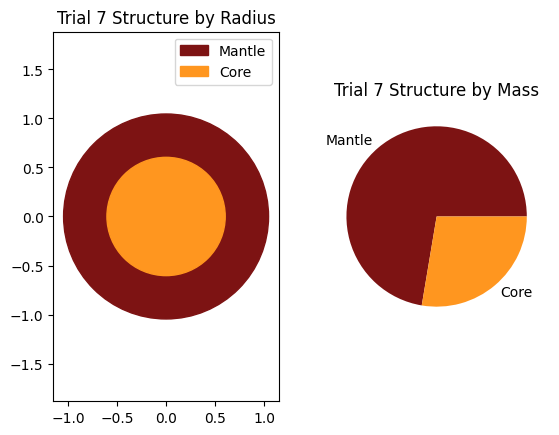

In [ ]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

core_7 = T1f_radius * (57.71 / 100)
core_mass_7 = T1f_mass * (27.64 / 100)
mantle_mass_7 = T1f_mass - core_mass_7
radii_7 = [T1f_radius, core_7]
mass_7 = [mantle_mass_7, core_mass_7]

#by radius
def concentric_circles(radii, colors):
    for i, radius in enumerate(radii):
        plt.subplot(1, 2, 1)
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True)
        plt.gca().add_patch(circle)
        plt.axis('equal')
        plt.title('Trial 7 Structure by Radius')
        plt.legend(labels)
        plt.plot()

concentric_circles(radii_7, structure_colors)

#By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_7, labels = labels, colors = structure_colors)
plt.title('Trial 7 Structure by Mass')
plt.show()

In [ ]:
!python Group_X.py --mass=1.039 --SiMg=0.6167 --FeMg=0.52 --mol_frac_Fe_mantle=0.08 --wt_frac_Si_core=0.06 --wt_frac_O_core=0.09 --wt_frac_S_core=0.21


Core composition:  {'Fe': np.float64(64.0), 'Si': np.float64(6.0), 'O': np.float64(9.0), 'S': np.float64(21.0)}
Mantle composition:  {'FeO': np.float64(8.51771794), 'SiO2': np.float64(36.50078224), 'MgO': np.float64(45.39318948), 'CaO': np.float64(4.4209273), 'Al2O3': np.float64(5.16738304)}
Mantle Fe# 0.09524334811993546
Core Mass Percent =  28.955

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_0.5SiMg_0.0NaMg_0.08Fe_U/LM_results.txt


Core composition:  {'Fe': np.float64(64.0), 'Si': np.float64(6.0), 'O': np.float64(9.0), 'S': np.float64(21.0)}
Mantle composition:  {'FeO': np.float64(8.51771794), 'SiO2': np.float64(36.50078224), 'MgO': np.float64(45.39318948), 'CaO': np.float64(4.4209273), 'Al2O3': np.float64(5.16738304)}
Mantle Fe# 0.09524334811993546
Core Mass Percent =  28.955

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_0.5SiMg_0.0NaMg_0.08Fe
The Lower mantle .tab already exists, please wait b

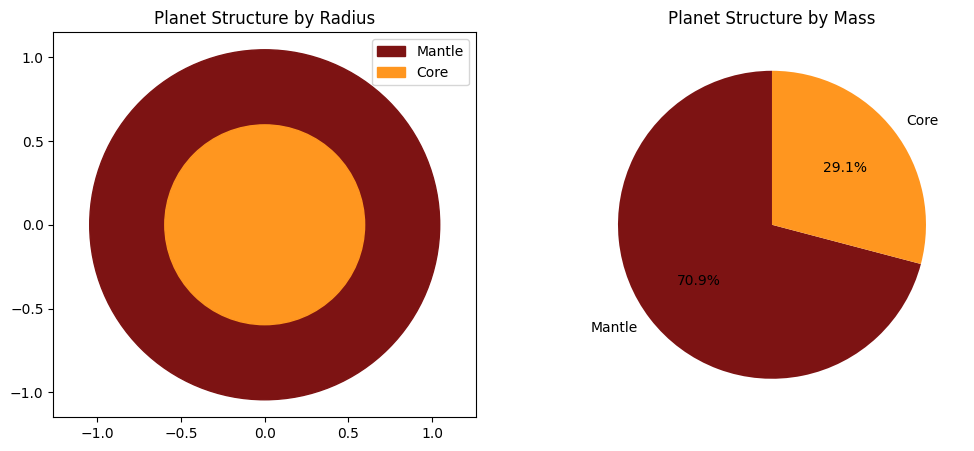

In [4]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

core_8 = T1f_radius * (57.09 / 100)
core_mass_8 = T1f_mass * (29.10 / 100)
mantle_mass_8 = T1f_mass - core_mass_8
radii_8 = [T1f_radius, core_8]
mass_8 = [mantle_mass_8, core_mass_8]

plt.figure(figsize=(12, 5))

#by radius
def concentric_circles(radii, colors):
    for i, radius in enumerate(radii):
        plt.subplot(1, 2, 1)
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True)
        plt.gca().add_patch(circle)
        plt.axis('equal')
        plt.title('Planet Structure by Radius')
        plt.legend(labels)
        plt.plot()

concentric_circles(radii_8, structure_colors)

#By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_8, labels = labels, colors = structure_colors, autopct='%1.1f%%', startangle=90)
plt.title('Planet Structure by Mass')
plt.show()

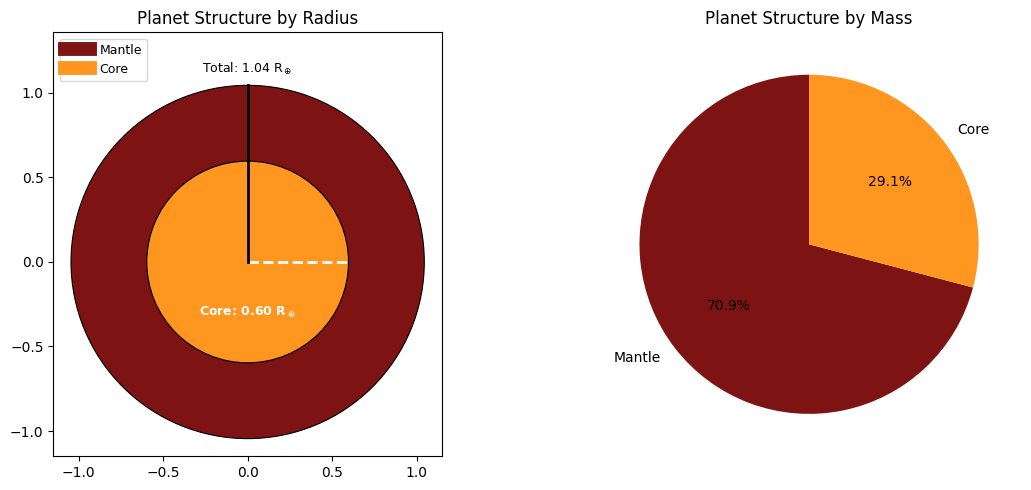

In [12]:
# Structure Plot

T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313','#ff961f']
labels = ["Mantle", "Core"]

# Core and Mantle (Trial 8)
core_8 = T1f_radius * (57.09 / 100)
core_mass_8 = T1f_mass * (29.10 / 100)
mantle_mass_8 = T1f_mass - core_mass_8
radii_8 = [T1f_radius, core_8]
mass_8 = [mantle_mass_8, core_mass_8]

plt.figure(figsize=(12, 5))

# By radius
def concentric_circles(radii, colors):
    ax = plt.subplot(1, 2, 1)
    for i, radius in enumerate(radii):
        circle = plt.Circle((0, 0), radius, color=colors[i], fill=True, ec='black', lw=0.8)
        ax.add_patch(circle)
    ax.set_aspect('equal')
    ax.set_xlim(-T1f_radius * 1.1, T1f_radius * 1.1)
    ax.set_ylim(-T1f_radius * 1.1, T1f_radius * 1.3)
    ax.set_title('Planet Structure by Radius')

   # Draw radius lines
    ax.plot([0, core_8], [0, 0], color='white', linewidth=2, linestyle='--', label='Core Radius')
    ax.plot([0, 0], [0, T1f_radius], color='black', linewidth=2, linestyle='-', label='Total Radius')

    # Overlay radius values
    ax.text(0, -core_8 / 2, f"Core: {core_8:.2f} R$_\oplus$",
            ha='center', va='center', fontsize=9, color='white', weight='bold')
    ax.text(0, T1f_radius + 0.05, f"Total: {T1f_radius:.2f} R$_\oplus$",
            ha='center', va='bottom', fontsize=9)

    # Legend
    legend_patches = [plt.Line2D([0], [0], color=c, lw=10) for c in colors]
    ax.legend(legend_patches, labels, loc='upper left', fontsize=9)

concentric_circles(radii_8, structure_colors)

# By mass:
plt.subplot(1, 2, 2)
plt.pie(mass_8, labels=labels, colors=structure_colors, autopct='%1.1f%%', startangle=90)
plt.title('Planet Structure by Mass')

plt.tight_layout()
plt.show()


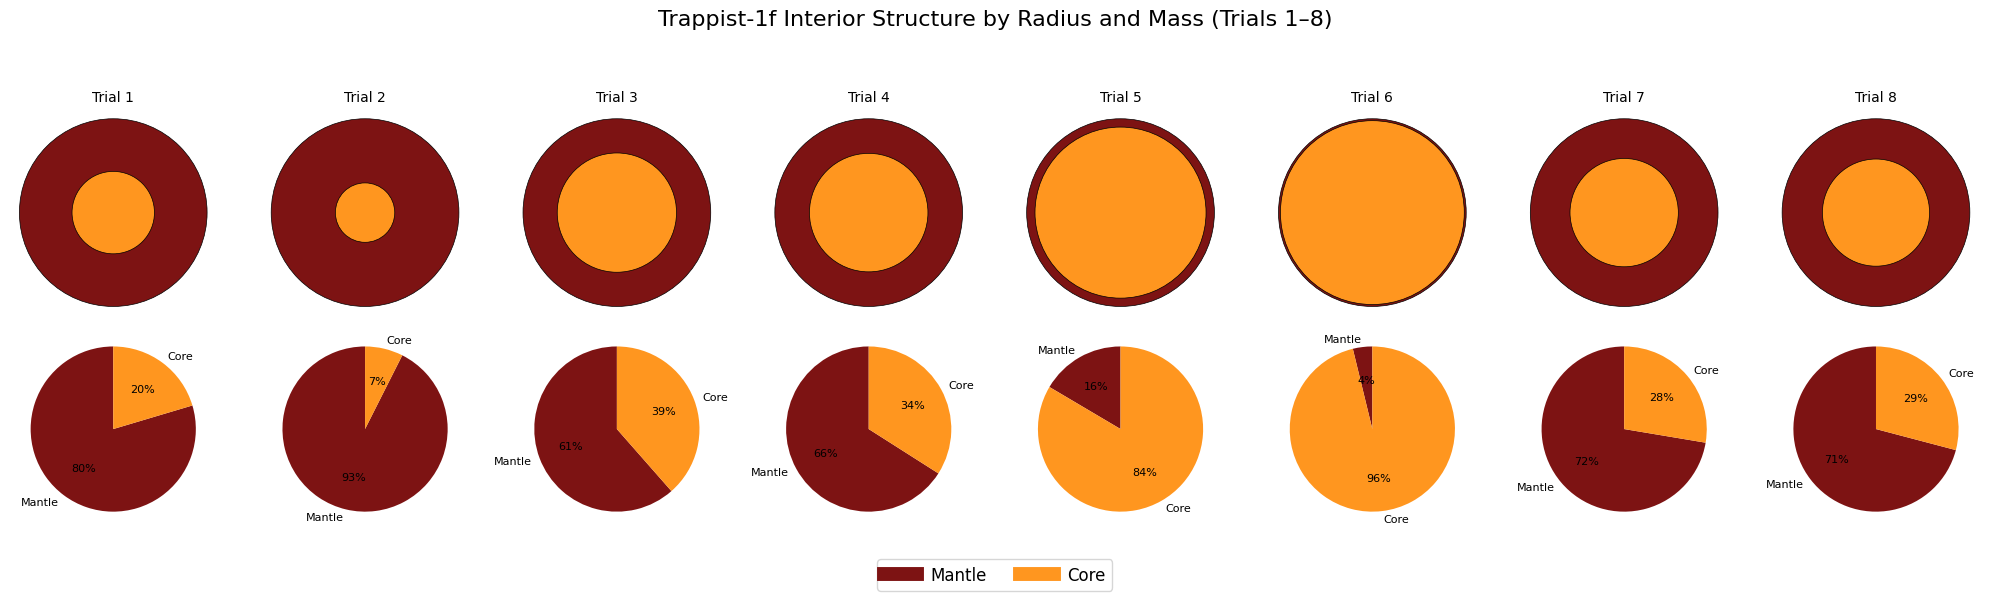

In [8]:
# Subplot with all trials
T1f_radius = 1.045
T1f_mass = 1.039
structure_colors = ['#7d1313', '#ff961f']  # Mantle, Core
labels = ["Mantle", "Core"]

# Trial data
core_radius_fracs = [0.4391, 0.3165, 0.6355, 0.6313, 0.9113, 0.9796, 0.5771, 0.5709]
core_mass_fracs   = [0.2039, 0.0744, 0.3852, 0.3402, 0.8350, 0.9620, 0.2764, 0.2910]

# Set up 2x8 subplot grid
fig, axes = plt.subplots(2, 8, figsize=(20, 6))

for i in range(8):
    # -------------------------
    # Top row: Radius structure
    # -------------------------
    ax_rad = axes[0, i]
    core_r = T1f_radius * core_radius_fracs[i]
    mantle_r = T1f_radius
    radii = [mantle_r, core_r]

    for j, radius in enumerate(radii):
        circle = plt.Circle((0, 0), radius, color=structure_colors[j], ec='black', lw=0.5)
        ax_rad.add_patch(circle)

    ax_rad.set_aspect('equal')
    ax_rad.set_xlim(-T1f_radius * 1.1, T1f_radius * 1.1)
    ax_rad.set_ylim(-T1f_radius * 1.1, T1f_radius * 1.1)
    ax_rad.axis('off')
    ax_rad.set_title(f'Trial {i + 1}', fontsize=10)

    # ----------------------
    # Bottom row: Mass pie
    # ----------------------
    ax_pie = axes[1, i]
    core_mass = T1f_mass * core_mass_fracs[i]
    mantle_mass = T1f_mass - core_mass
    ax_pie.pie(
        [mantle_mass, core_mass],
        labels=labels,
        colors=structure_colors,
        startangle=90,
        autopct='%1.0f%%',
        textprops={'fontsize': 8}
    )
    ax_pie.set(aspect='equal')

# Legend & layout
fig.legend(
    [plt.Line2D([0], [0], color=c, lw=10) for c in structure_colors],
    labels,
    loc='lower center',
    ncol=2,
    fontsize=12
)

plt.suptitle("Trappist-1f Interior Structure by Radius and Mass (Trials 1–8)", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()

### What works:

##### No core impurities, adjust Fe/Mg and FeO if necessary:
- Lowest possible Fe/Mg = 0.39, when FeO = 0 (Trial 1)
- Highest possible Fe/Mg = 0.44, when FeO = 0.66 (Trial 2)

##### Stellar Fe/Mg, no FeO in mantle, adjust core impurities:
- S:0, Lowest O: 0.19 when Si:0 (Trial 3)
- S:0, Highest O: 0.22 when Si:0.07 (Trial 4)


- Si:0, Highest O: 0.19 when S:0 (Trial 5)
- Si:0, Lowest O: 0.05 when S: 0.85-0.93 (Trial 6)

##### Stellar Fe/Mg, adjust FeO in mantle and impurities in core:
- FeO: 0.3 and O: 0.22, with Si:0, S:0 (Trial 7)

##### Adjust everything and get a core that looks pretty:
- Fe/Mg:0.52, FeO:0.08, Si:0.06, O:0.09, S:0.21 (Trial 8)

## Task 5

Trial 8 mantle minerology:

FeO: 8.52%, SiO2: 36.5%, MgO: 45.4%, CaO: 4.42%, Al2O3: 5.17%

\

Earth mantle minerology:

FeO: 8.18%, SiO: 44.71%, MgO: 38.73%, CaO: 3.17%, Al2O3: 3.98%

## Resources

https://science.nasa.gov/exoplanet-catalog/trappist-1-f/
https://exoplanetarchive.ipac.caltech.edu/overview/trappist-1#star_TRAPPIST-1_collapsible
https://arxiv.org/abs/2006.13826
https://iopscience.iop.org/article/10.3847/PSJ/abd022/pdf
https://sites.uni.edu/morgans/astro/course/Notes/section2/solarcomp.html
https://www.sciencedirect.com/science/article/abs/pii/S0012821X04007101?via%3Dihub

https://arxiv.org/pdf/1301.6674